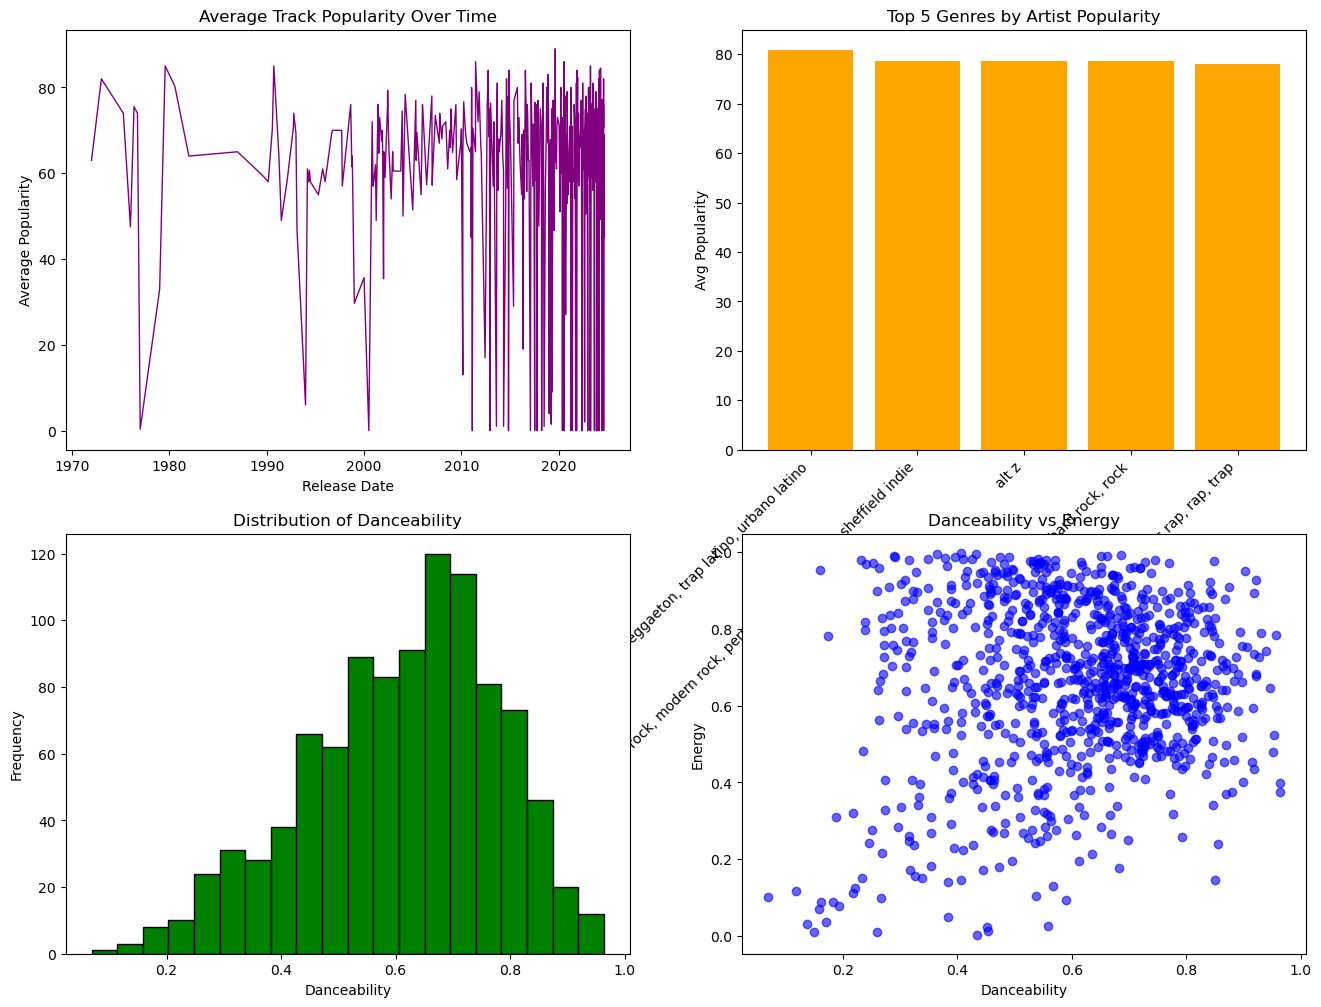

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("spotify.csv")

# Convert 'release_date' to datetime
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df_sorted = df.sort_values('release_date')

# Set up figure
plt.style.use('default')
plt.figure(figsize=(16, 12))

# 1. Line Chart
plt.subplot(2, 2, 1)
df_time = df_sorted.groupby('release_date')['track_popularity'].mean()
plt.plot(df_time.index, df_time.values, color='purple', linewidth=1)
plt.title('Average Track Popularity Over Time')
plt.xlabel('Release Date')
plt.ylabel('Average Popularity')

# 2. Bar Chart: Top 5 Genres by Artist Popularity
plt.subplot(2, 2, 2)
top_genres = df.groupby('genres')['artist_popularity'].mean().sort_values(ascending=False).head(5)
plt.bar(top_genres.index, top_genres.values, color='orange')
plt.title('Top 5 Genres by Artist Popularity')
plt.xlabel('Genres')
plt.ylabel('Avg Popularity')
plt.xticks(rotation=45, ha='right')

# 3. Histogram: Distribution of Danceability
plt.subplot(2, 2, 3)
plt.hist(df['danceability'], bins=20, color='green', edgecolor='black')
plt.title('Distribution of Danceability')
plt.xlabel('Danceability')
plt.ylabel('Frequency')

# 4. Scatter Plot: Danceability vs Energy
plt.subplot(2, 2, 4)
plt.scatter(df['danceability'], df['energy'], alpha=0.6, color='blue')
plt.title('Danceability vs Energy')
plt.xlabel('Danceability')
plt.ylabel('Energy')

# Show plots
plt.show()
